<a href="https://colab.research.google.com/github/Katla19/walmart-eda-CLT/blob/main/Walmart_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('wal.csv')
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
print("unique values:")
for i in df.columns:
  print( i, ':',len(df[i].unique()))

unique values:
User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
df['Marital_Status']=df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Gender']=df['Gender'].replace({'F':'Female','M':'Male'})

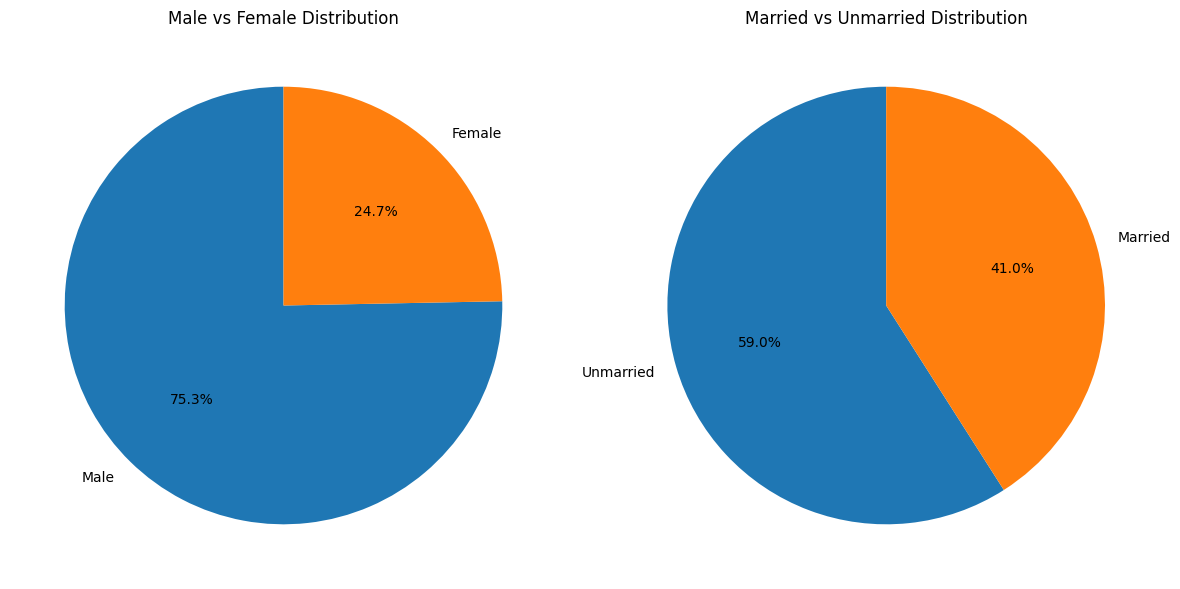

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Male vs Female Pie Chart
gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=90)
axes[0].set_title('Male vs Female Distribution')
# Married vs Unmarried Pie Chart
marital_counts = df['Marital_Status'].value_counts()
axes[1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%',startangle=90)
axes[1].set_title('Married vs Unmarried Distribution')
plt.tight_layout()
plt.show()

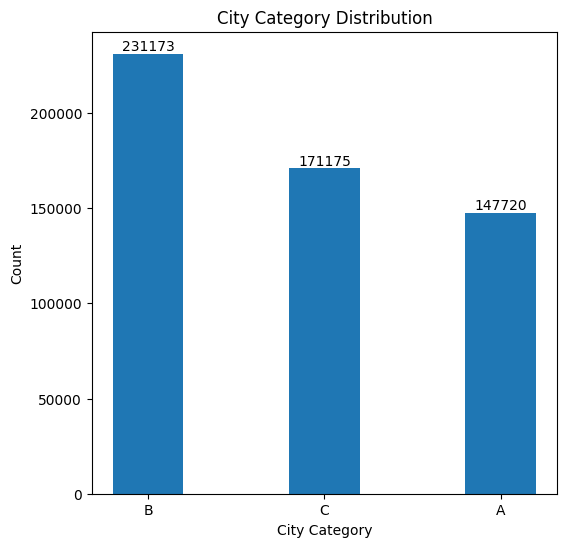

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=df['City_Category'].value_counts()
ax.bar(c.index,c.values,width=0.4)
ax.set_title('City Category Distribution')
ax.set_xlabel('City Category')
ax.set_ylabel('Count')
for i, value in enumerate(c.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

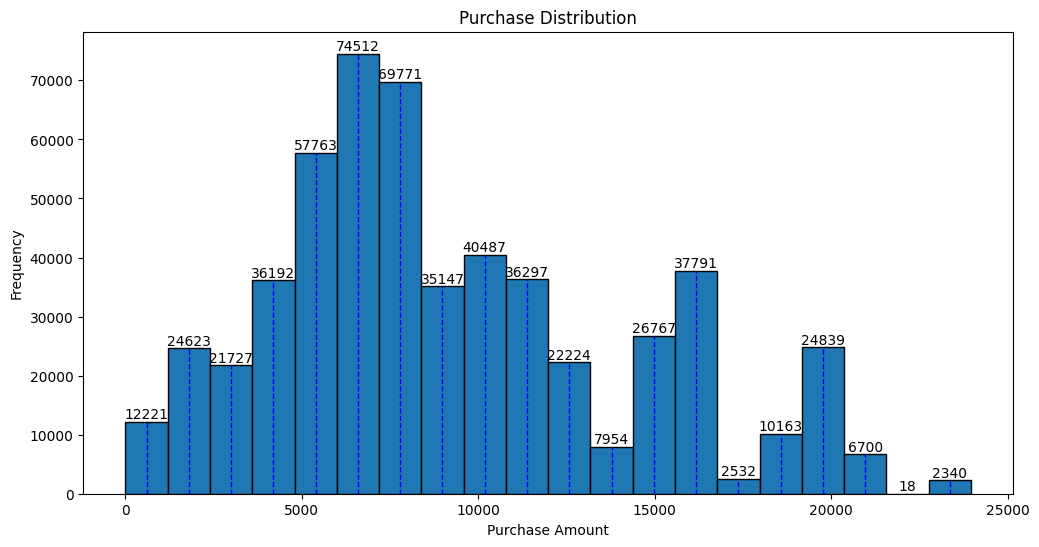

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(df['Purchase'], bins=20, edgecolor='black')
for i in range(len(bins) - 1):
    bin_center = (bins[i] + bins[i+1]) / 2
    ax.vlines(x=bin_center, ymin=0, ymax=n[i], color='blue', linestyle='--', linewidth=1)
    ax.text(bin_center, n[i] + 2, str(int(n[i])), ha='center', va='bottom', fontsize=10)
ax.set_xlabel('Purchase Amount')
ax.set_ylabel('Frequency')
ax.set_title('Purchase Distribution')
plt.show()

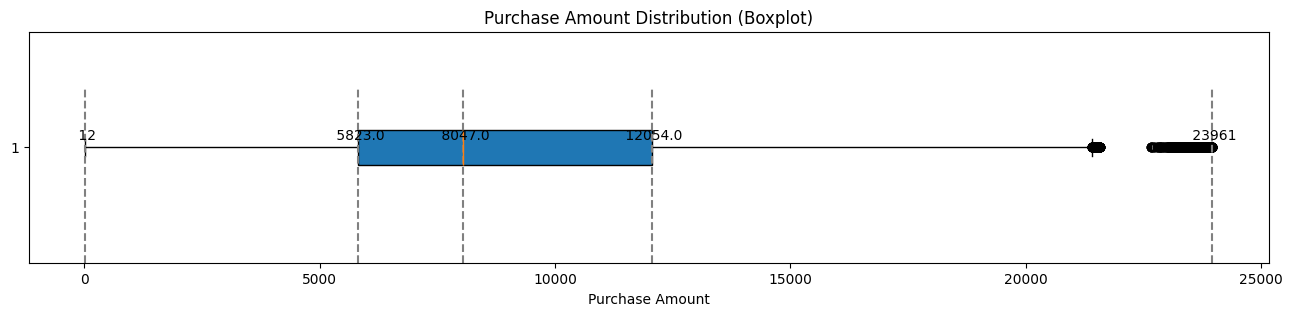

In [ ]:
fig, ax = plt.subplots(figsize=(16, 3))
box = ax.boxplot(df['Purchase'], vert=False, patch_artist=True)
ax.set_xlabel('Purchase Amount')
ax.set_title('Purchase Amount Distribution (Boxplot)')
min_val = df['Purchase'].min()
q1_val = df['Purchase'].quantile(0.25)
median_val = df['Purchase'].median()
q3_val = df['Purchase'].quantile(0.75)
max_val = df['Purchase'].max()
for value, label in zip([min_val, q1_val, median_val, q3_val, max_val], ['Min', 'Q1', 'Median', 'Q3', 'Max']):
    ax.axvline(value, color='grey', linestyle='--', ymax=0.75)  # Vertical lines
    ax.text(value, 1.02, f' {value}', ha='center', va='bottom', fontsize=10, color='black')  # Annotation
plt.show()

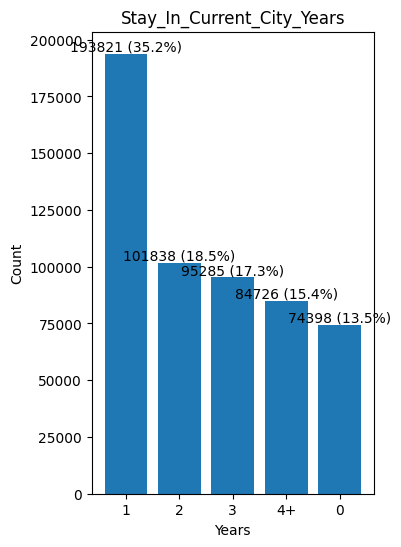

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[0.2, 0.4])
ax0 = fig.add_subplot(gs[0, 0])
temp = df['Stay_In_Current_City_Years'].value_counts()
total = temp.sum()
ax0.bar(x=temp.index, height=temp.values)
for i, value in enumerate(temp.values):
    percent = (value / total) * 100  # Calculate percentage
    ax0.text(i, value + 5, f'{value} ({percent:.1f}%)', ha='center', va='bottom', fontsize=10)
ax0.set_title('Stay_In_Current_City_Years')
ax0.set_xlabel('Years')
ax0.set_ylabel('Count')
plt.show()

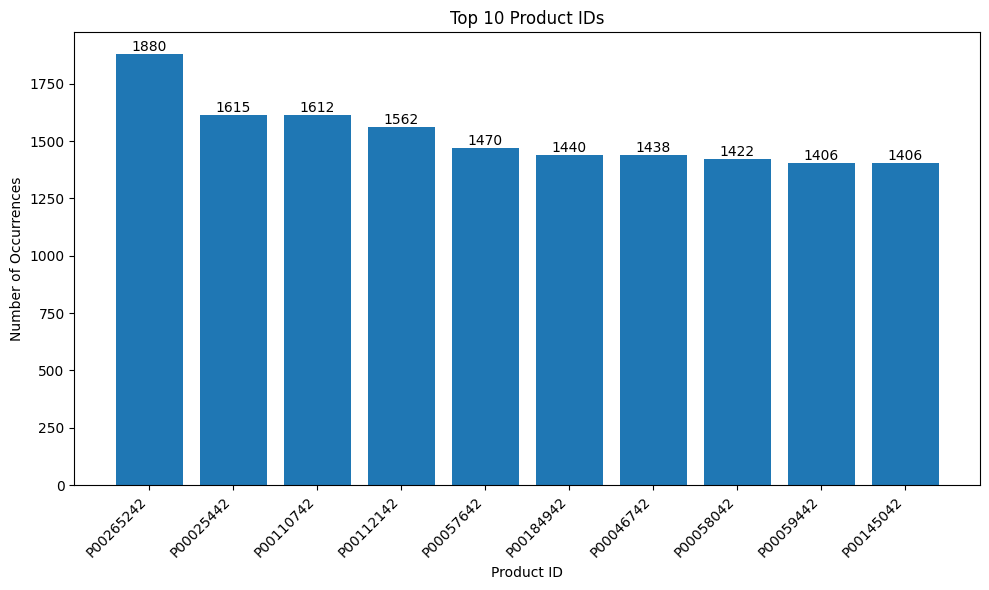

In [ ]:
product_counts = df['Product_ID'].value_counts()
top_10_products = product_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products.index, top_10_products.values)
plt.xlabel('Product ID')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Product IDs')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_products.values):
  plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

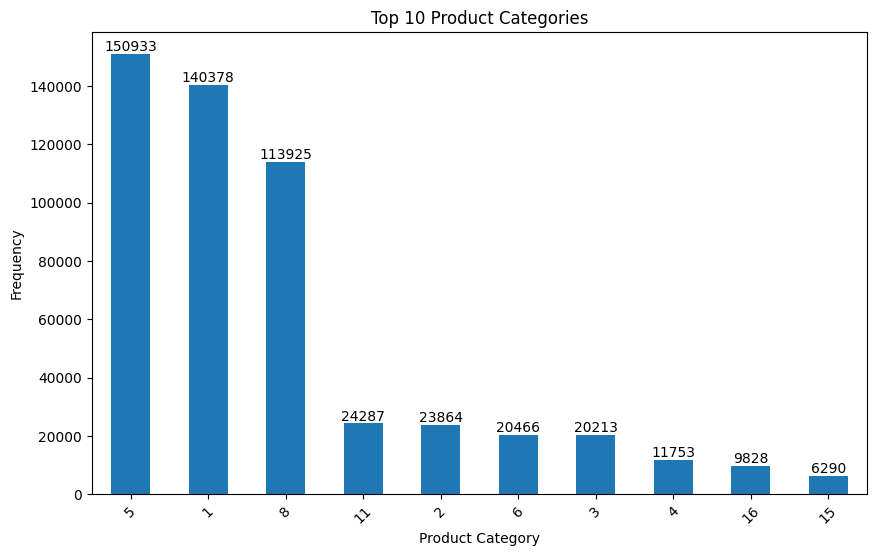

In [ ]:
top_categories = df['Product_Category'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
for index, value in enumerate(top_categories):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.show()

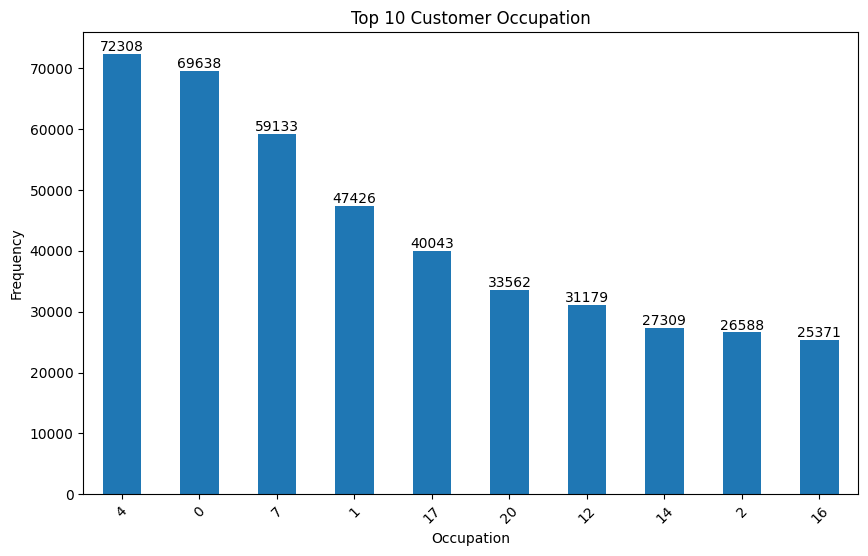

In [ ]:
top_categories = df['Occupation'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title("Top 10 Customer Occupation")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
for index, value in enumerate(top_categories):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.show()

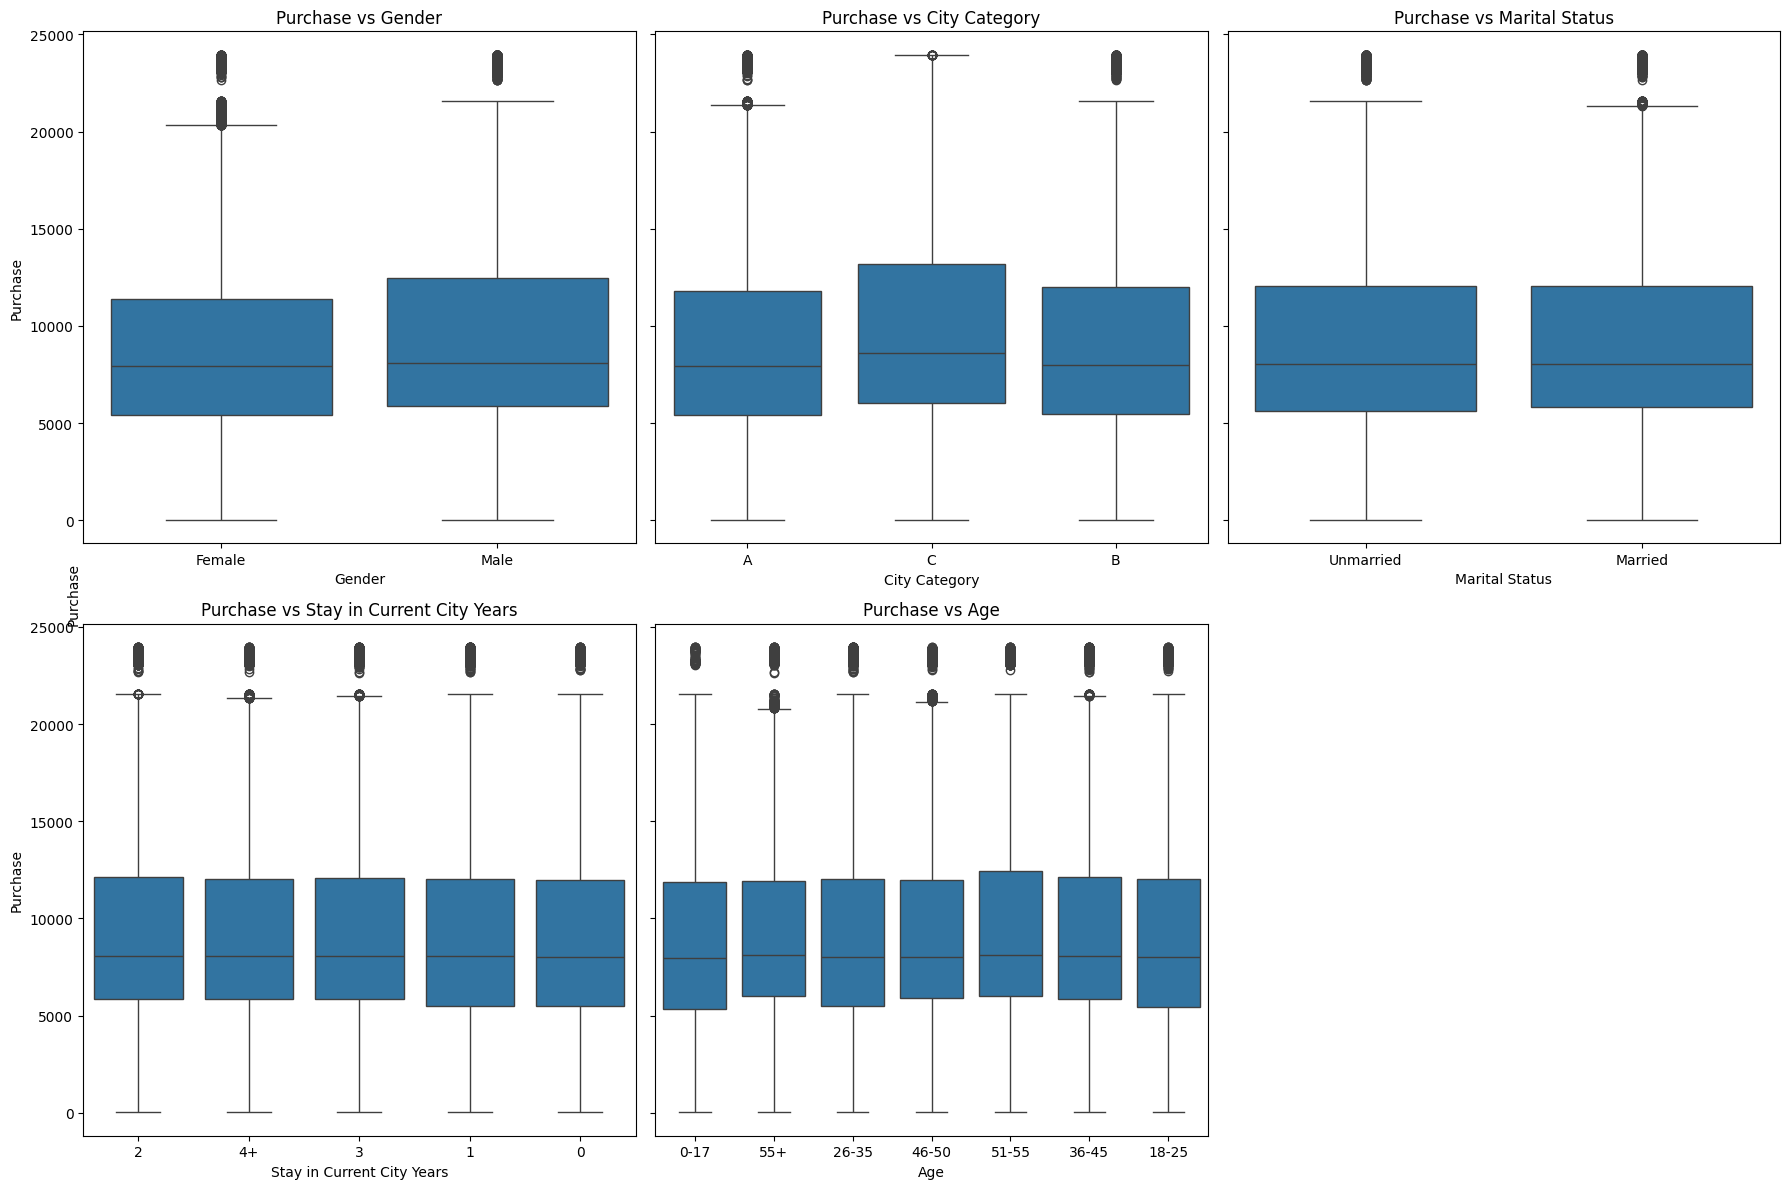

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
sns.boxplot(x='Gender', y='Purchase', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Purchase vs Gender')
axes[0, 0].set_xlabel('Gender')
sns.boxplot(x='City_Category', y='Purchase', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Purchase vs City Category')
axes[0, 1].set_xlabel('City Category')
sns.boxplot(x='Marital_Status', y='Purchase', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Purchase vs Marital Status')
axes[0, 2].set_xlabel('Marital Status')
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Purchase vs Stay in Current City Years')
axes[1, 0].set_xlabel('Stay in Current City Years')
sns.boxplot(x='Age', y='Purchase', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Purchase vs Age')
axes[1, 1].set_xlabel('Age')
axes[1, 2].axis('off')
fig.text(0.04, 0.5, 'Purchase', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

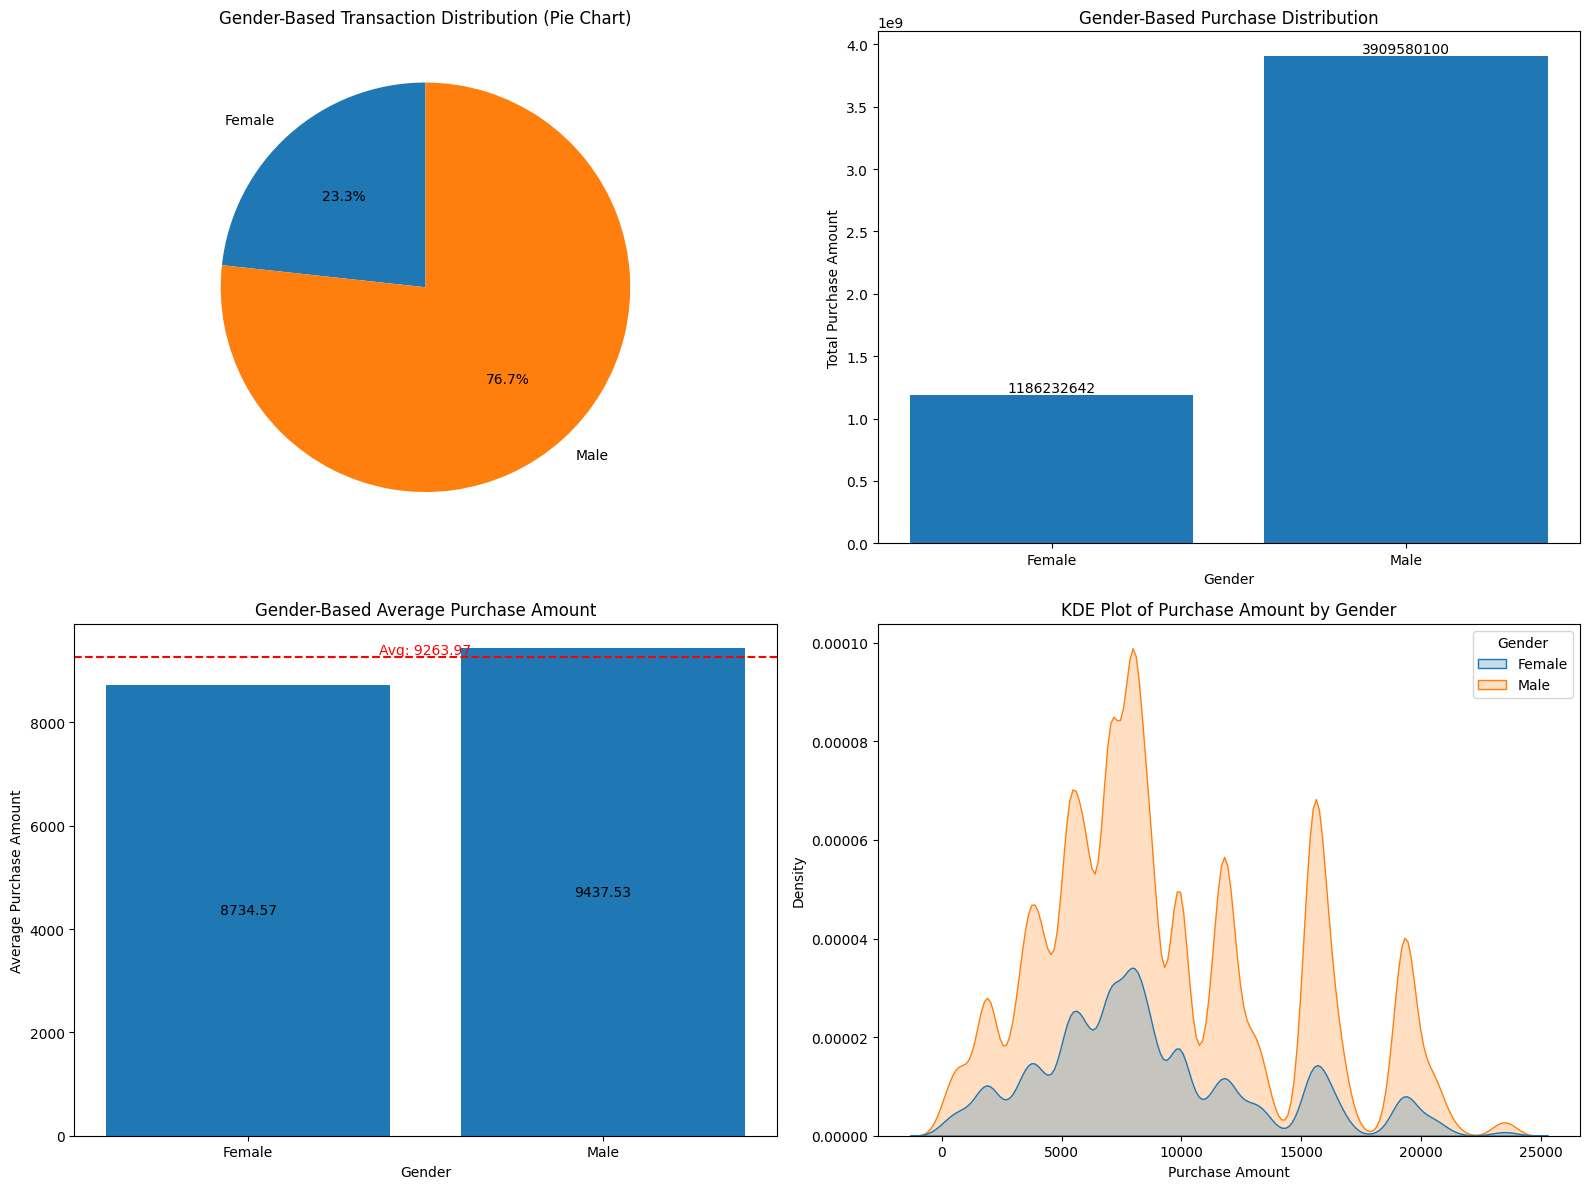

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
gender_purchase = df.groupby('Gender')['Purchase'].sum()
axes[0, 0].pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender-Based Transaction Distribution (Pie Chart)')
axes[0, 1].bar(gender_purchase.index, gender_purchase.values)
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Total Purchase Amount')
axes[0, 1].set_title('Gender-Based Purchase Distribution')
for i, v in enumerate(gender_purchase.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', va='bottom')
gender_avg_purchase = df.groupby('Gender')['Purchase'].mean()
axes[1, 0].bar(gender_avg_purchase.index, gender_avg_purchase.values)
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Average Purchase Amount')
axes[1, 0].set_title('Gender-Based Average Purchase Amount')
overall_avg = df['Purchase'].mean()
axes[1, 0].axhline(y=overall_avg, color='r', linestyle='--')
axes[1, 0].text(0.5, overall_avg, f'Avg: {round(overall_avg, 2)}', color='red', ha='center', va='bottom')
for i, v in enumerate(gender_avg_purchase.values):
    axes[1, 0].text(i, v / 2, str(round(v, 2)), ha='center', va='center')
sns.kdeplot(data=df, x='Purchase', hue='Gender', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('KDE Plot of Purchase Amount by Gender')
axes[1, 1].set_xlabel('Purchase Amount')
axes[1, 1].set_ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
def confidence_interval(data,ci):
 l_ci = (100-ci)/2
 u_ci = (100+ci)/2
 interval = np.percentile(data,[l_ci,u_ci]).round(0)
 return interval
def plot(ci):
 #setting the plot style
 fig = plt.figure(figsize = (15,8))
 gs = fig.add_gridspec(2,2)
 #creating separate data frames for each gender
 df_male = df.loc[df['Gender'] == 'Male','Purchase']
 df_female = df.loc[df['Gender'] == 'Female','Purchase']
 #sample sizes and corresponding plot positions
 sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]
 #number of samples to be taken from purchase amount
 bootstrap_samples = 20000
 male_samples = {}
 female_samples = {}
 for i,x,y in sample_sizes:
  male_means = [] #list for collecting the means of male sample
  female_means = [] #list for collecting the means of female sample
  for j in range(bootstrap_samples):
    #creating random 5000 samples of i sample size
    male_bootstrapped_samples = np.random.choice(df_male,size = i)
    female_bootstrapped_samples = np.random.choice(df_female,size = i)
    #calculating mean of those samples
    male_sample_mean = np.mean(male_bootstrapped_samples)
    female_sample_mean = np.mean(female_bootstrapped_samples)
    #appending the mean to the list
    male_means.append(male_sample_mean)
    female_means.append(female_sample_mean)
  #storing the above sample generated
  male_samples[f'{ci}%_{i}'] = male_means
  female_samples[f'{ci}%_{i}'] = female_means
  #creating a temporary dataframe for creating kdeplot
  temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})
  #plotting kdeplots
  #plot position
  ax = fig.add_subplot(gs[x,y])

  #plots for male and female
  sns.kdeplot(data = temp_df,x = 'male_means',fill = True, alpha = 0.5,ax = ax,label = 'Male')
  sns.kdeplot(data = temp_df,x = 'female_means' ,fill = True, alpha = 0.5,ax = ax,label = 'Female')
  #calculating confidence intervals for given confidence level(ci)
  m_range = confidence_interval(male_means,ci)
  f_range = confidence_interval(female_means,ci)
  #plotting confidence interval on the distribution
  for k in m_range:
    ax.axvline(x = k,ymax = 0.9,linestyle = '--')
  for k in f_range:
    ax.axvline(x = k,ymax = 0.9,linestyle = '--')
  #removing the axis lines
  for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
  # adjusting axis labels
  ax.set_yticks([])
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_title(f'CLT Curve for Sample Size = {i}')
  plt.legend()
 fig.suptitle(f'{ci}% Confidence Interval')
 plt.show()
 return male_samples,female_samples

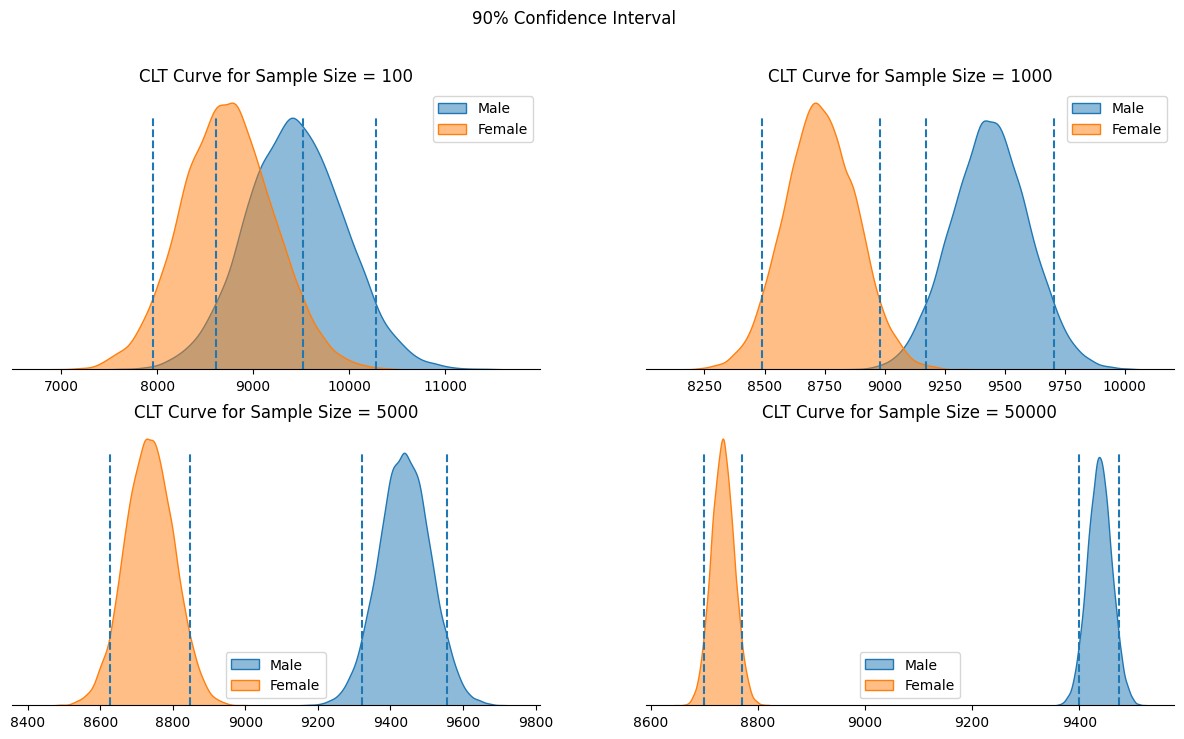

In [ ]:
 m_samp_90,f_samp_90 = plot(90)

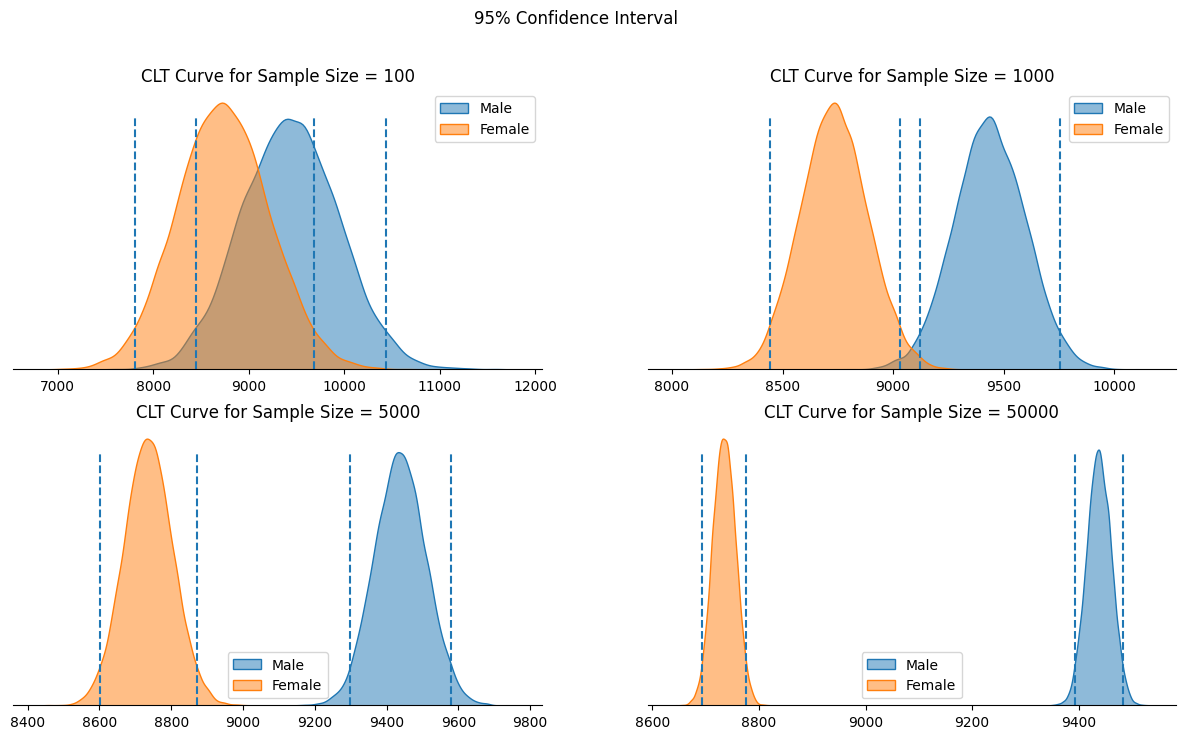

In [ ]:
 m_samp_95,f_samp_95= plot(95)

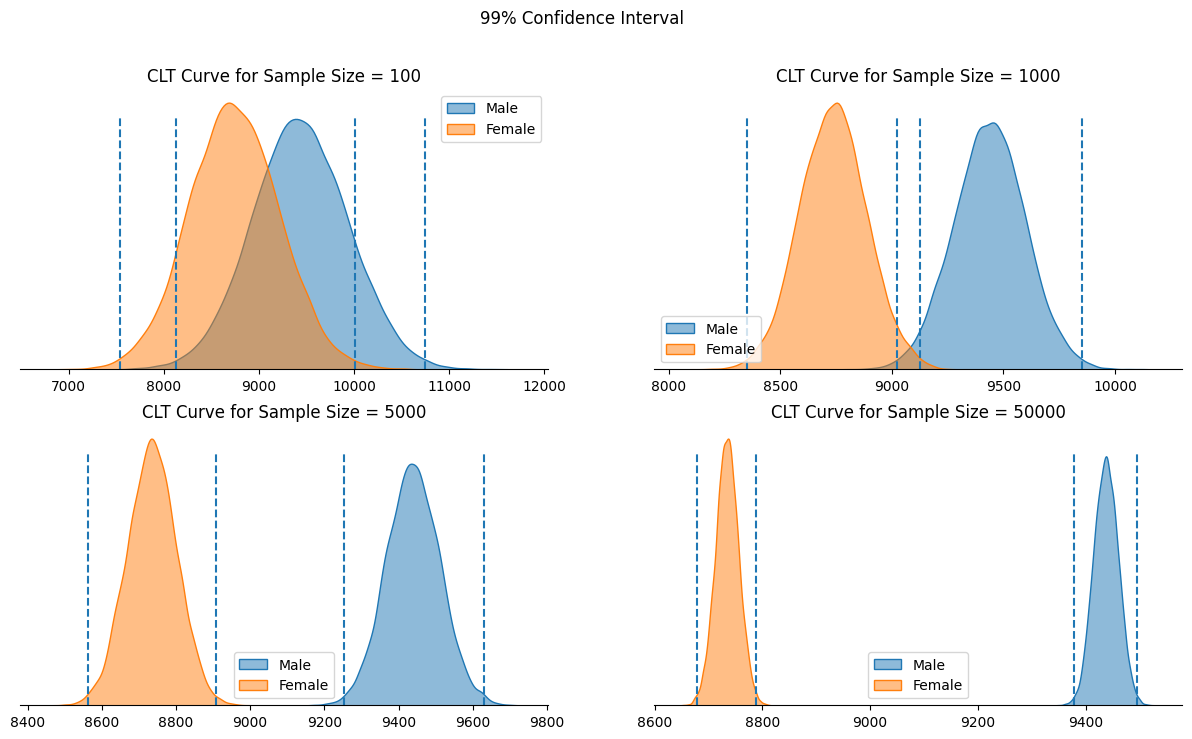

In [ ]:
 m_samp_99,f_samp_99 = plot(99)

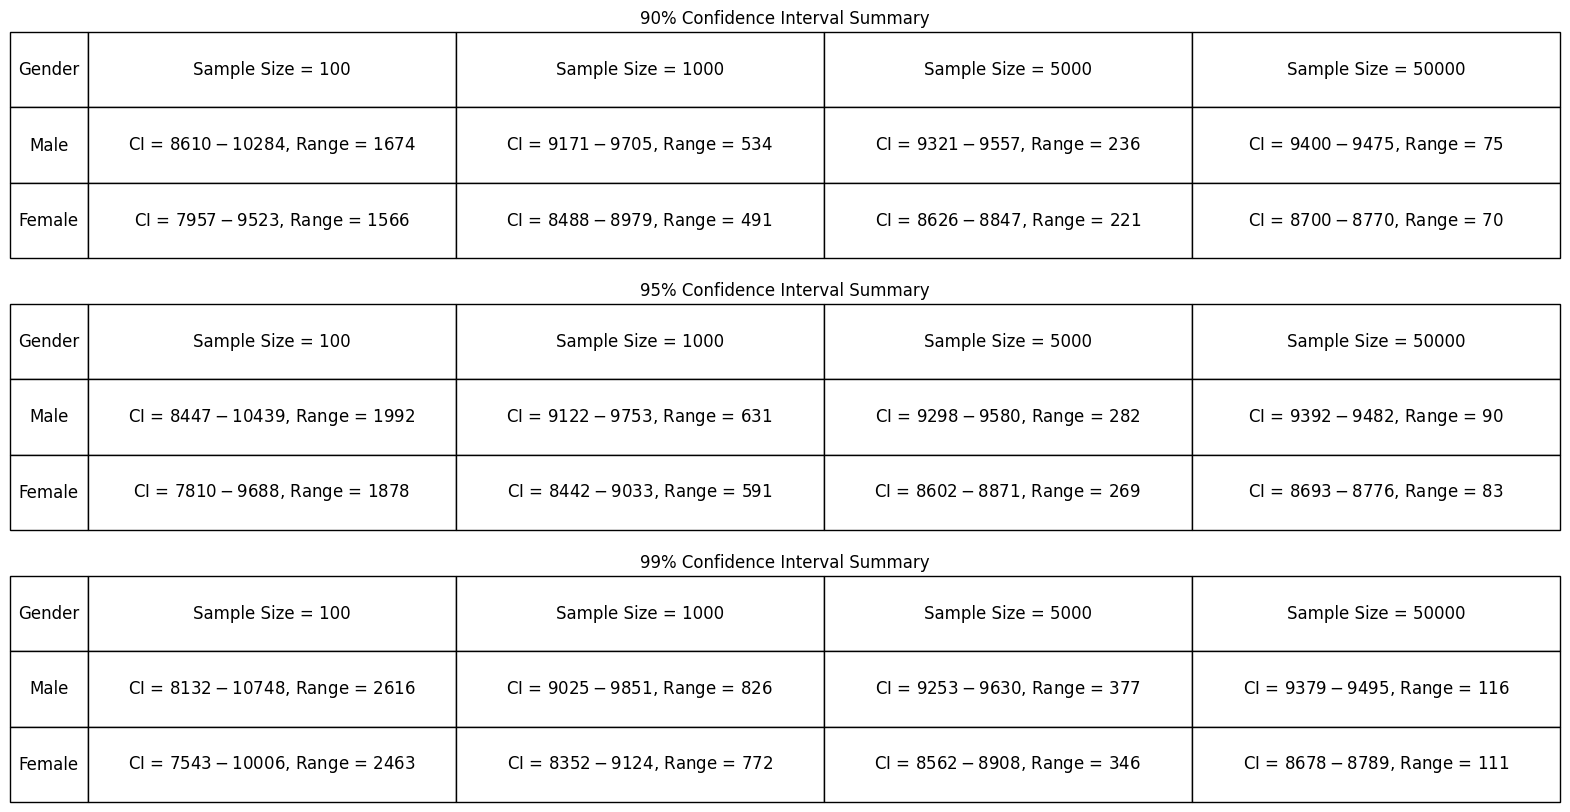

In [ ]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)
for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
 #list for collecting ci for given cl
 m_ci = ['Male']
 f_ci = ['Female']

 #finding ci for each sample size (males)
 for m in i:
  m_range = confidence_interval(i[m],k)
  m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

 #finding ci for each sample size (females)
 for f in j:
  f_range = confidence_interval(j[f],k)
  f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

 #plotting the summary
 ax = fig.add_subplot(gs[l])

 #contents of the table
 ci_info = [m_ci,f_ci]

 #plotting the table
 table = ax.table(cellText = ci_info, cellLoc='center',
 colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
 colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])
 table.set_fontsize(13)
 #removing axis
 ax.axis('off')

 #setting title
 ax.set_title(f"{k}% Confidence Interval Summary")


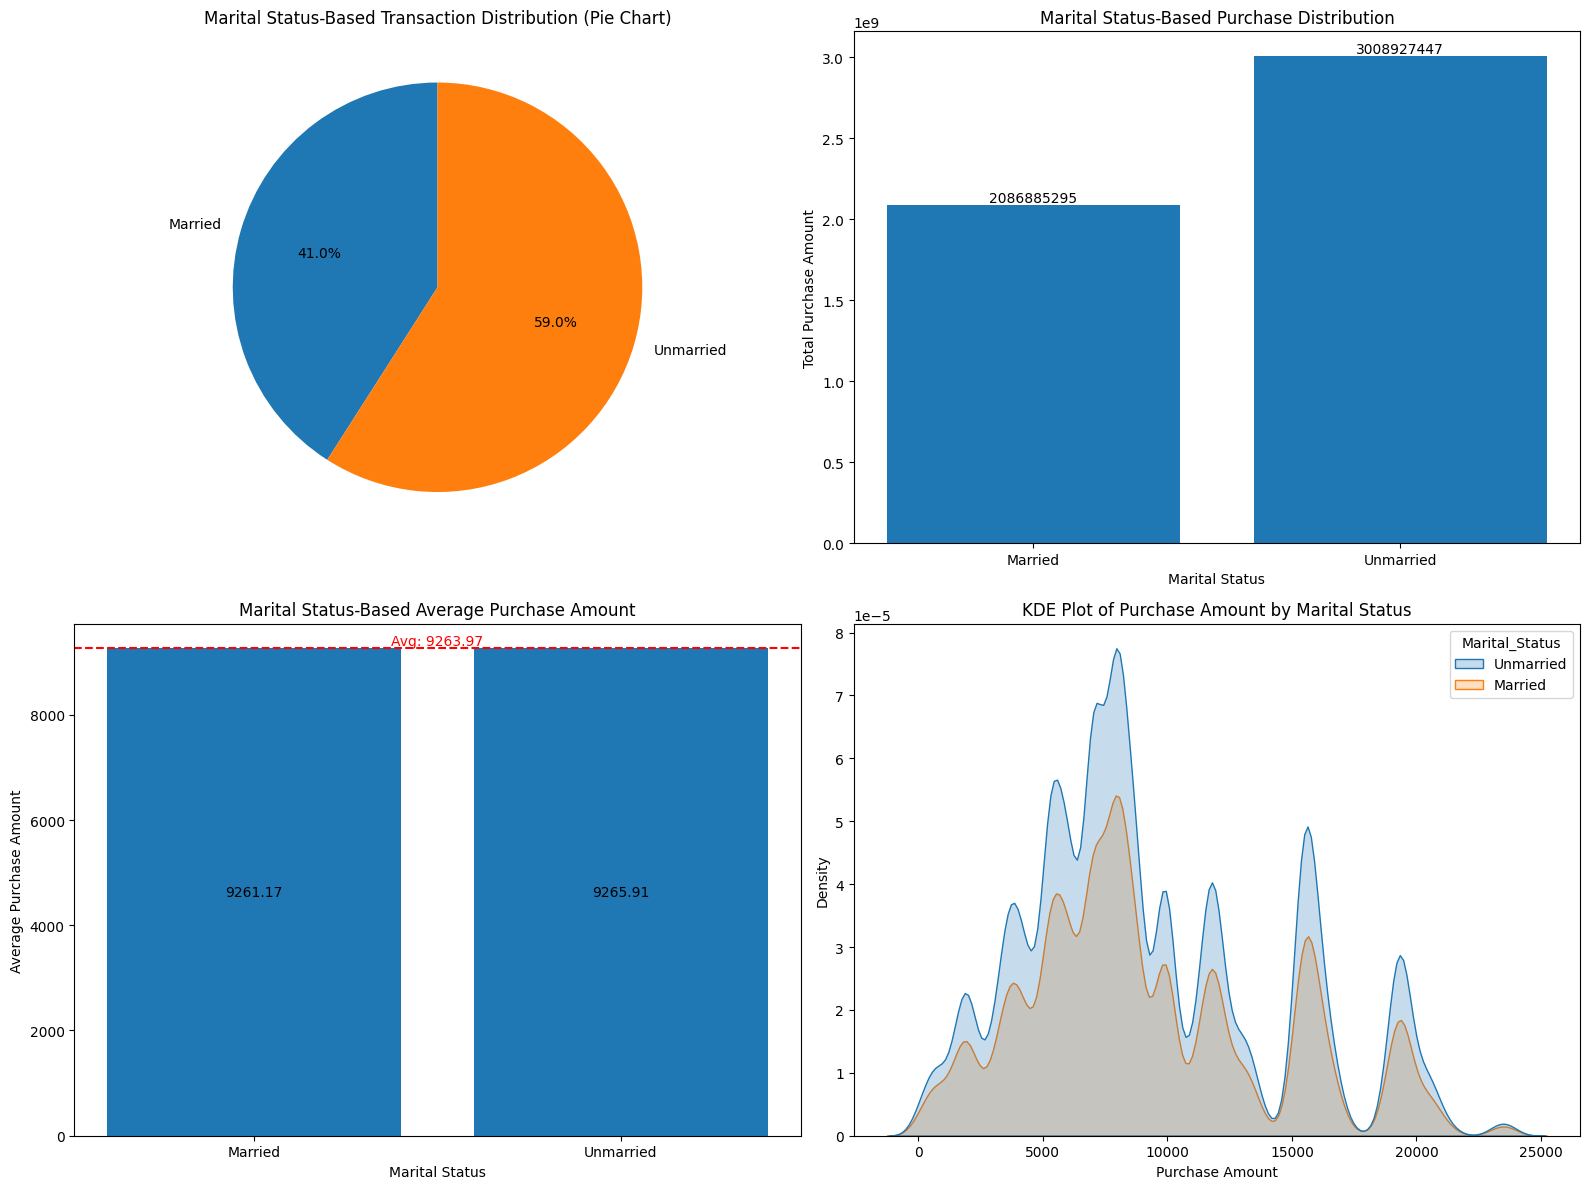

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
marital_purchase = df.groupby('Marital_Status')['Purchase'].sum()
axes[0, 0].pie(marital_purchase, labels=marital_purchase.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Marital Status-Based Transaction Distribution (Pie Chart)')
axes[0, 1].bar(marital_purchase.index, marital_purchase.values)
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Total Purchase Amount')
axes[0, 1].set_title('Marital Status-Based Purchase Distribution')
for i, v in enumerate(marital_purchase.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', va='bottom')
marital_avg_purchase = df.groupby('Marital_Status')['Purchase'].mean()
axes[1, 0].bar(marital_avg_purchase.index, marital_avg_purchase.values)
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Average Purchase Amount')
axes[1, 0].set_title('Marital Status-Based Average Purchase Amount')
overall_avg = df['Purchase'].mean()
axes[1, 0].axhline(y=overall_avg, color='r', linestyle='--')
axes[1, 0].text(0.5, overall_avg, f'Avg: {round(overall_avg, 2)}', color='red', ha='center', va='bottom')
for i, v in enumerate(marital_avg_purchase.values):
    axes[1, 0].text(i, v / 2, str(round(v, 2)), ha='center', va='center')
sns.kdeplot(data=df, x='Purchase', hue='Marital_Status', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('KDE Plot of Purchase Amount by Marital Status')
axes[1, 1].set_xlabel('Purchase Amount')
axes[1, 1].set_ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
def confidence_interval(data, ci):
    l_ci = (100 - ci) / 2
    u_ci = (100 + ci) / 2
    interval = np.percentile(data, [l_ci, u_ci]).round(0)
    return interval

def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Creating separate data frames for each marital status
    df_married = df.loc[df['Marital_Status'] == 'Married', 'Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(100, 0, 0), (1000, 0, 1), (5000, 1, 0), (50000, 1, 1)]

    # Number of bootstrap samples to take
    bootstrap_samples = 20000
    married_samples = {}
    unmarried_samples = {}

    for i, x, y in sample_sizes:
        married_means = []  # List to collect the means of married samples
        unmarried_means = []  # List to collect the means of unmarried samples

        for j in range(bootstrap_samples):
            # Creating random samples of size `i`
            married_bootstrapped_samples = np.random.choice(df_married, size=i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried, size=i)

            # Calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            # Appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        # Storing the generated samples
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        # Creating a temporary DataFrame for kdeplot
        temp_df = pd.DataFrame(data={'married_means': married_means, 'unmarried_means': unmarried_means})

        # Plotting KDE plots
        ax = fig.add_subplot(gs[x, y])

        # KDE plots for married and unmarried
        sns.kdeplot(data=temp_df, x='married_means', fill=True, alpha=0.5, ax=ax, label='Married')
        sns.kdeplot(data=temp_df, x='unmarried_means', fill=True, alpha=0.5, ax=ax, label='Unmarried')

        # Calculating confidence intervals for given confidence level (ci)
        married_range = confidence_interval(married_means, ci)
        unmarried_range = confidence_interval(unmarried_means, ci)

        # Plotting confidence interval lines
        for k in married_range:
            ax.axvline(x=k, ymax=0.9, linestyle='--')
        for k in unmarried_range:
            ax.axvline(x=k, ymax=0.9, linestyle='--')

        # Removing the axis lines
        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Adjusting axis labels and title
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(f'CLT Curve for Sample Size = {i}')
        plt.legend()

    # Setting the overall title and displaying the plot
    fig.suptitle(f'{ci}% Confidence Interval')
    plt.show()

    return married_samples, unmarried_samples



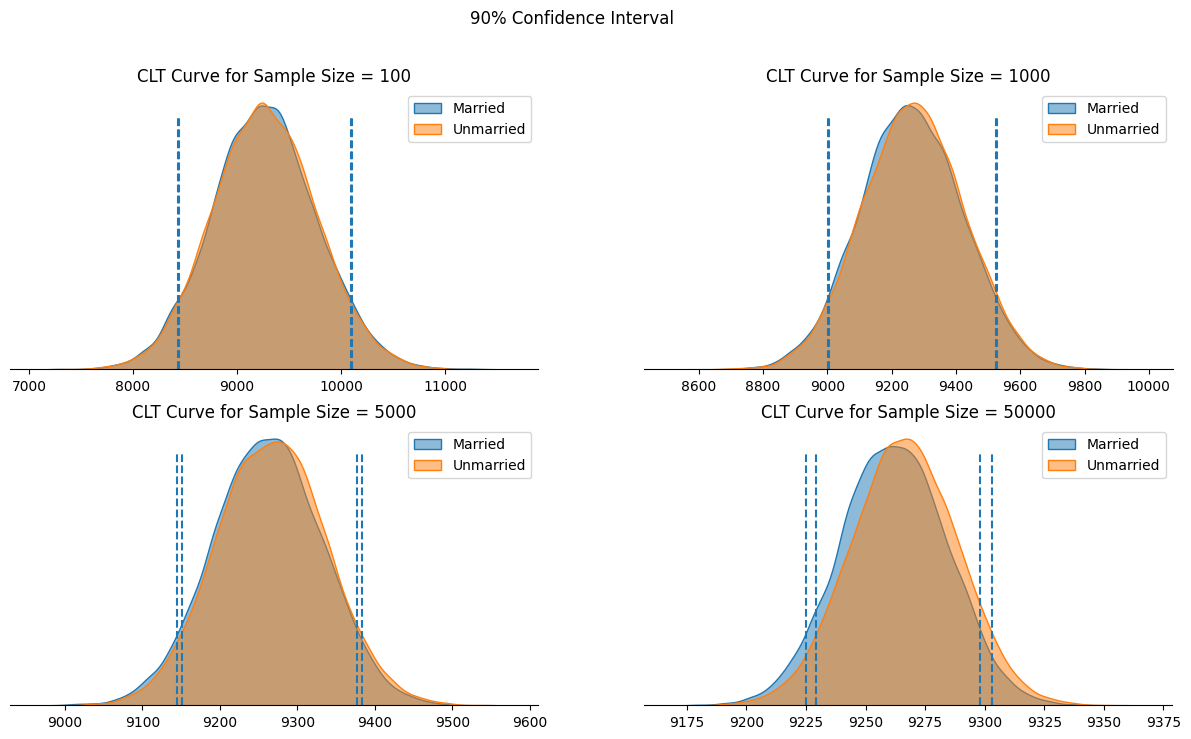

In [ ]:
m_samp_90,u_samp_90 = plot(90)

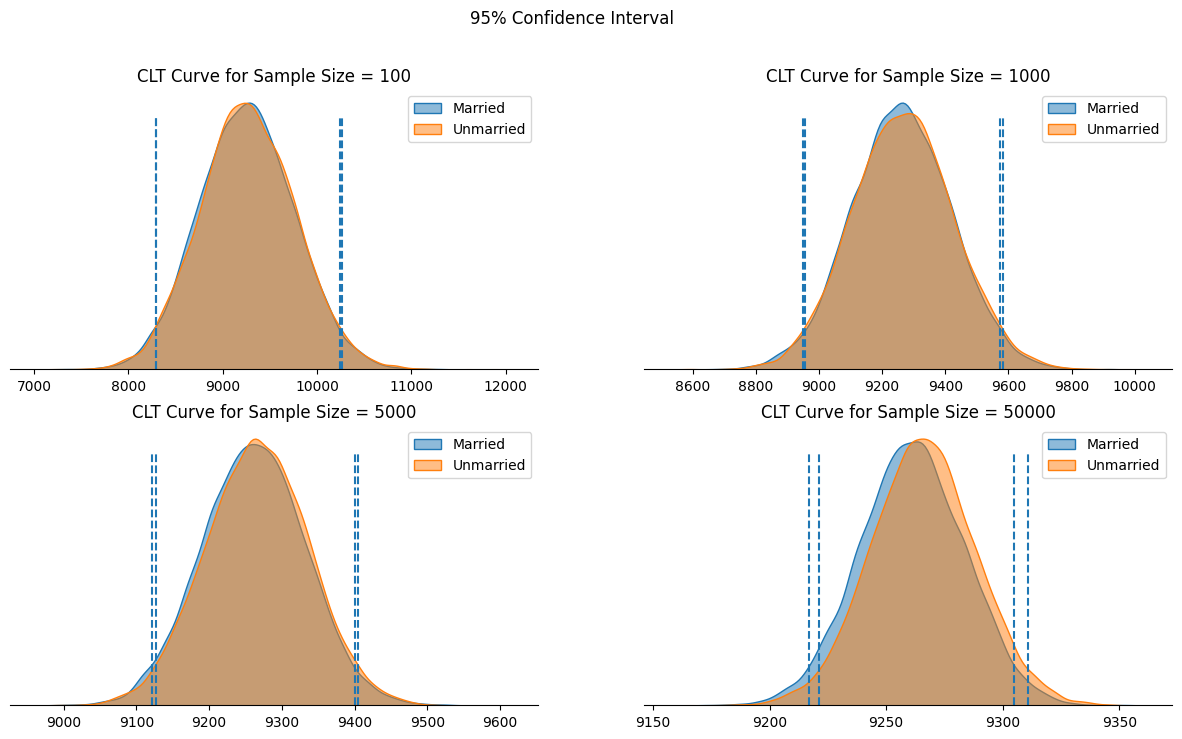

In [ ]:
m_samp_95,u_samp_95 = plot(95)

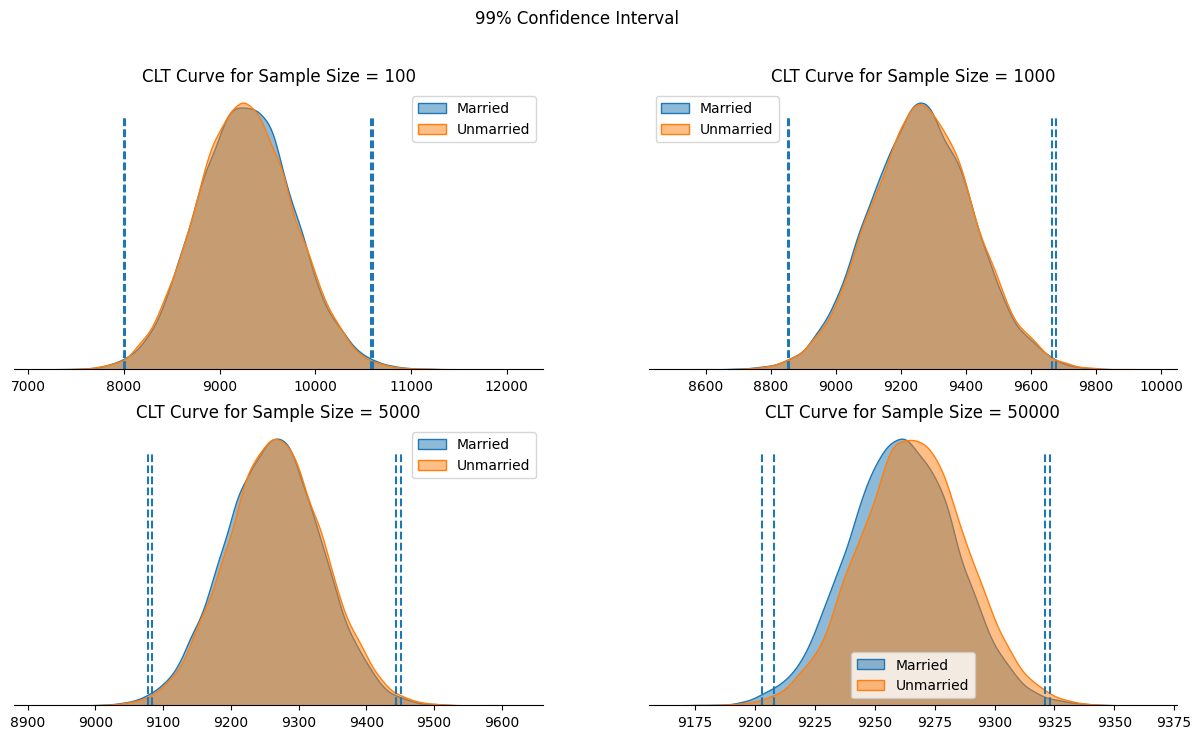

In [ ]:
m_samp_99,u_samp_99 = plot(99)

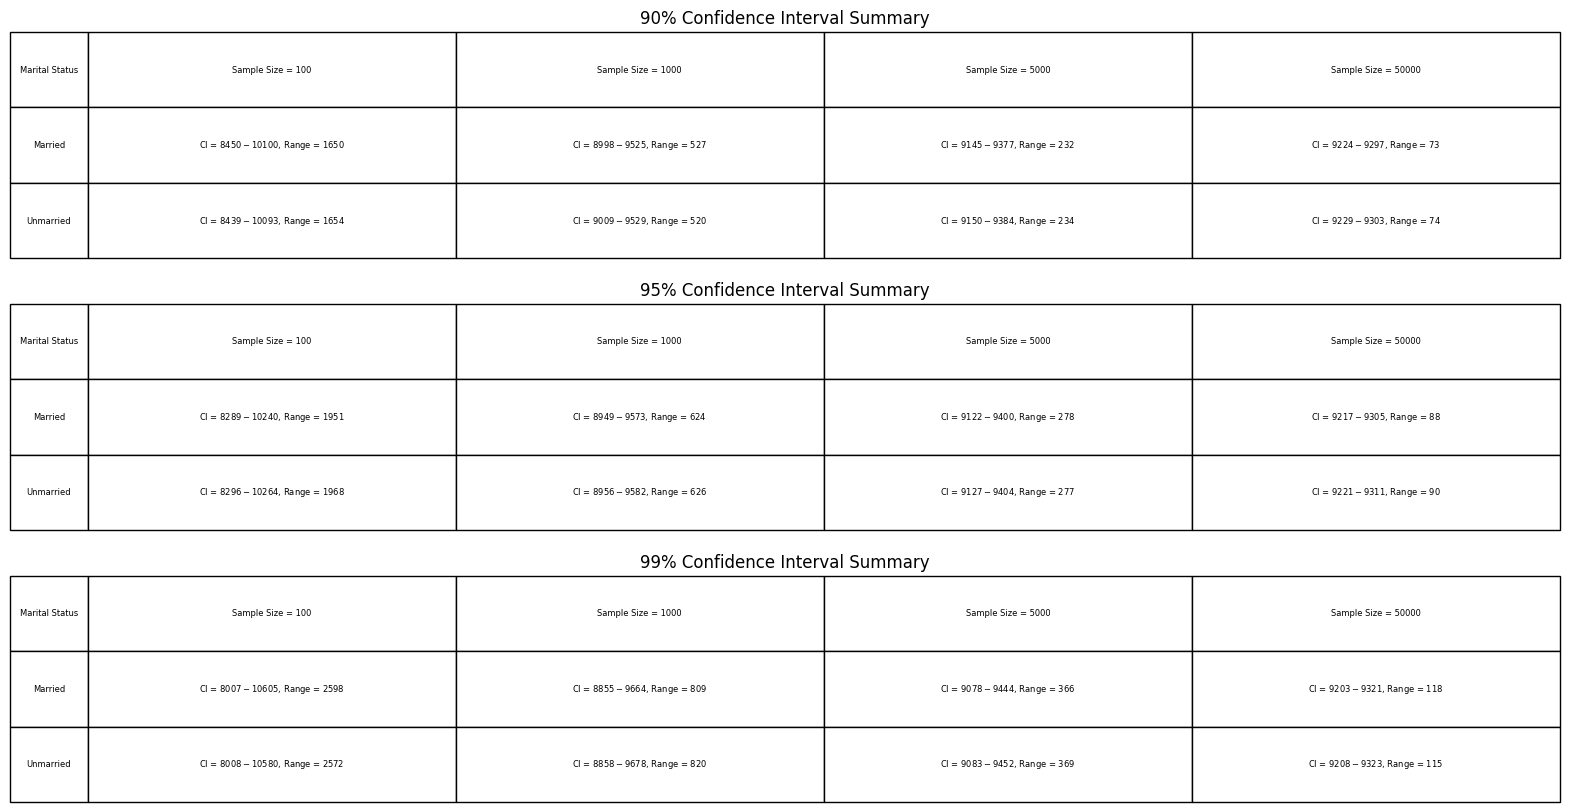

In [ ]:
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(3, 1)

# Loop over each confidence level (90%, 95%, 99%)
for married_samples, unmarried_samples, conf_level, position in [(m_samp_90, u_samp_90, 90, 0),
                                                                 (m_samp_95, u_samp_95, 95, 1),
                                                                 (m_samp_99, u_samp_99, 99, 2)]:
    # List for collecting confidence interval info
    married_ci = ['Married']
    unmarried_ci = ['Unmarried']

    # Finding CI for each sample size (married)
    for sample_size in married_samples:
        married_range = confidence_interval(married_samples[sample_size], conf_level)
        married_ci.append(f"CI = ${married_range[0]:.0f} - ${married_range[1]:.0f}, Range = {(married_range[1] - married_range[0]):.0f}")

    # Finding CI for each sample size (unmarried)
    for sample_size in unmarried_samples:
        unmarried_range = confidence_interval(unmarried_samples[sample_size], conf_level)
        unmarried_ci.append(f"CI = ${unmarried_range[0]:.0f} - ${unmarried_range[1]:.0f}, Range = {(unmarried_range[1] - unmarried_range[0]):.0f}")

    # Plotting the summary table
    ax = fig.add_subplot(gs[position])

    # Contents of the table
    ci_info = [married_ci, unmarried_ci]

    # Plotting the table
    table = ax.table(cellText=ci_info, cellLoc='center',
                     colLabels=['Marital Status', 'Sample Size = 100', 'Sample Size = 1000',
                                'Sample Size = 5000', 'Sample Size = 50000'],
                     colLoc='center', colWidths=[0.05, 0.2375, 0.2375, 0.2375, 0.2375], bbox=[0, 0, 1, 1])
    table.set_fontsize(13)

    # Removing axis
    ax.axis('off')

    # Setting title
    ax.set_title(f"{conf_level}% Confidence Interval Summary")


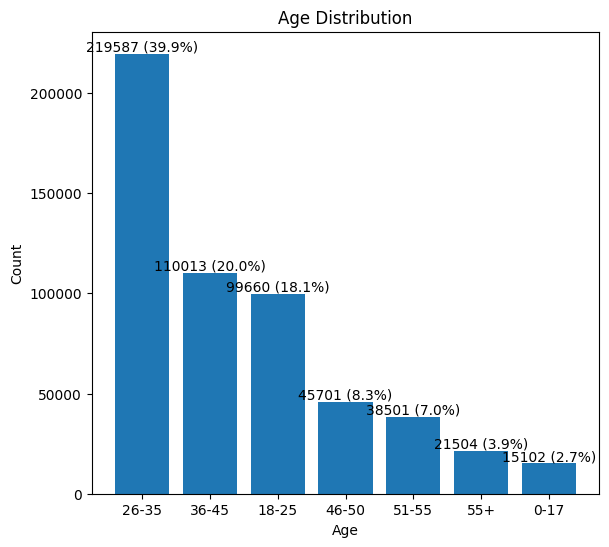

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4])
ax0 = fig.add_subplot(gs[0, 0])
temp = df['Age'].value_counts()
total = temp.sum()
ax0.bar(x=temp.index, height=temp.values)
for i, value in enumerate(temp.values):
    percent = (value / total) * 100  # Calculate percentage
    ax0.text(i, value + 5, f'{value} ({percent:.1f}%)', ha='center', va='bottom', fontsize=10)
ax0.set_title('Age Distribution')
ax0.set_xlabel('Age')
ax0.set_ylabel('Count')
plt.show()

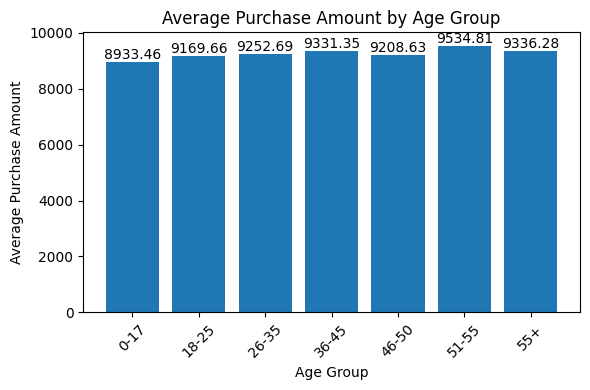

In [ ]:
age_avg_purchase = df.groupby('Age')['Purchase'].mean()
plt.figure(figsize=(6, 4))
bars = plt.bar(age_avg_purchase.index, age_avg_purchase.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

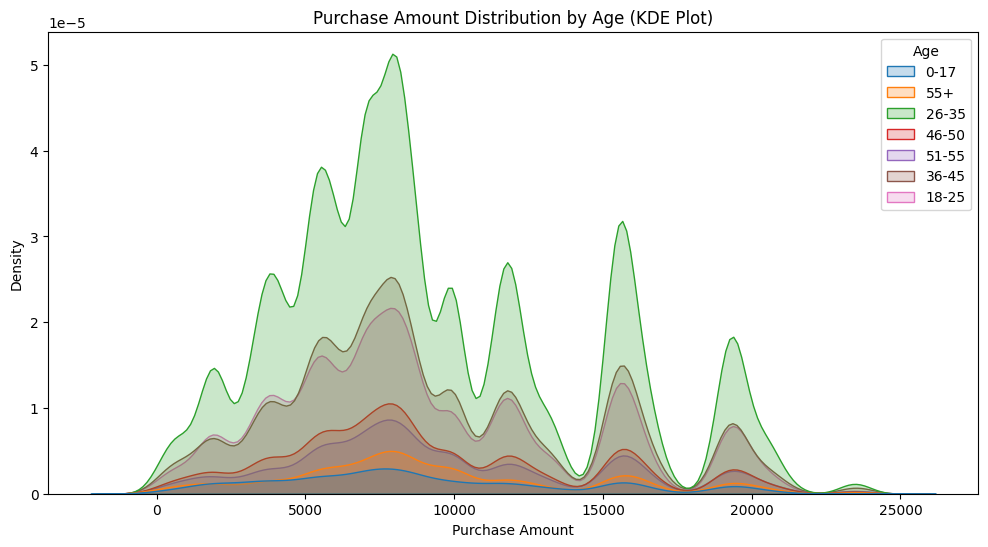

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Purchase', hue='Age', fill=True)
plt.title('Purchase Amount Distribution by Age (KDE Plot)')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

In [ ]:
def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(4, 1)

    # Creating separate data frames for each age group
    df_1 = df.loc[df['Age'] == '0-17', 'Purchase']
    df_2 = df.loc[df['Age'] == '18-25', 'Purchase']
    df_3 = df.loc[df['Age'] == '26-35', 'Purchase']
    df_4 = df.loc[df['Age'] == '36-45', 'Purchase']
    df_5 = df.loc[df['Age'] == '46-50', 'Purchase']
    df_6 = df.loc[df['Age'] == '51-55', 'Purchase']
    df_7 = df.loc[df['Age'] == '55+', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(100, 0), (1000, 1), (5000, 2), (50000, 3)]
    bootstrap_samples = 20000

    # Dictionaries to store sample data for each age group
    samples1, samples2, samples3, samples4, samples5, samples6, samples7 = {}, {}, {}, {}, {}, {}, {}

    # Loop over each sample size and create plots
    for i, x in sample_sizes:
        l1, l2, l3, l4, l5, l6, l7 = [], [], [], [], [], [], []
        for _ in range(bootstrap_samples):
            # Creating random samples of size i for each age group
            bootstrapped_samples_1 = np.random.choice(df_1, size=i)
            bootstrapped_samples_2 = np.random.choice(df_2, size=i)
            bootstrapped_samples_3 = np.random.choice(df_3, size=i)
            bootstrapped_samples_4 = np.random.choice(df_4, size=i)
            bootstrapped_samples_5 = np.random.choice(df_5, size=i)
            bootstrapped_samples_6 = np.random.choice(df_6, size=i)
            bootstrapped_samples_7 = np.random.choice(df_7, size=i)

            # Calculating mean of those samples and appending to lists
            l1.append(np.mean(bootstrapped_samples_1))
            l2.append(np.mean(bootstrapped_samples_2))
            l3.append(np.mean(bootstrapped_samples_3))
            l4.append(np.mean(bootstrapped_samples_4))
            l5.append(np.mean(bootstrapped_samples_5))
            l6.append(np.mean(bootstrapped_samples_6))
            l7.append(np.mean(bootstrapped_samples_7))

        # Storing the generated samples for each age group
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        # Creating a temporary DataFrame for plotting KDE plots
        temp_df = pd.DataFrame(data={'0-17': l1, '18-25': l2, '26-35': l3, '36-45': l4,
                                     '46-50': l5, '51-55': l6, '55+': l7})

        # Plotting KDE plots
        ax = fig.add_subplot(gs[x])
        for age_group in ('0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'):
            sns.kdeplot(data=temp_df, x=age_group, fill=True, alpha=0.5, ax=ax, label=age_group)

        # Removing unnecessary axis lines and adjusting axis labels
        for spine in ['top', 'left', 'right']:
            ax.spines[spine].set_visible(False)
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(f'CLT Curve for Sample Size = {i}')
        ax.legend()

    # Setting the main title for the figure
    fig.suptitle(f'{ci}% Confidence Interval')
    plt.show()

    return samples1, samples2, samples3, samples4, samples5, samples6, samples7


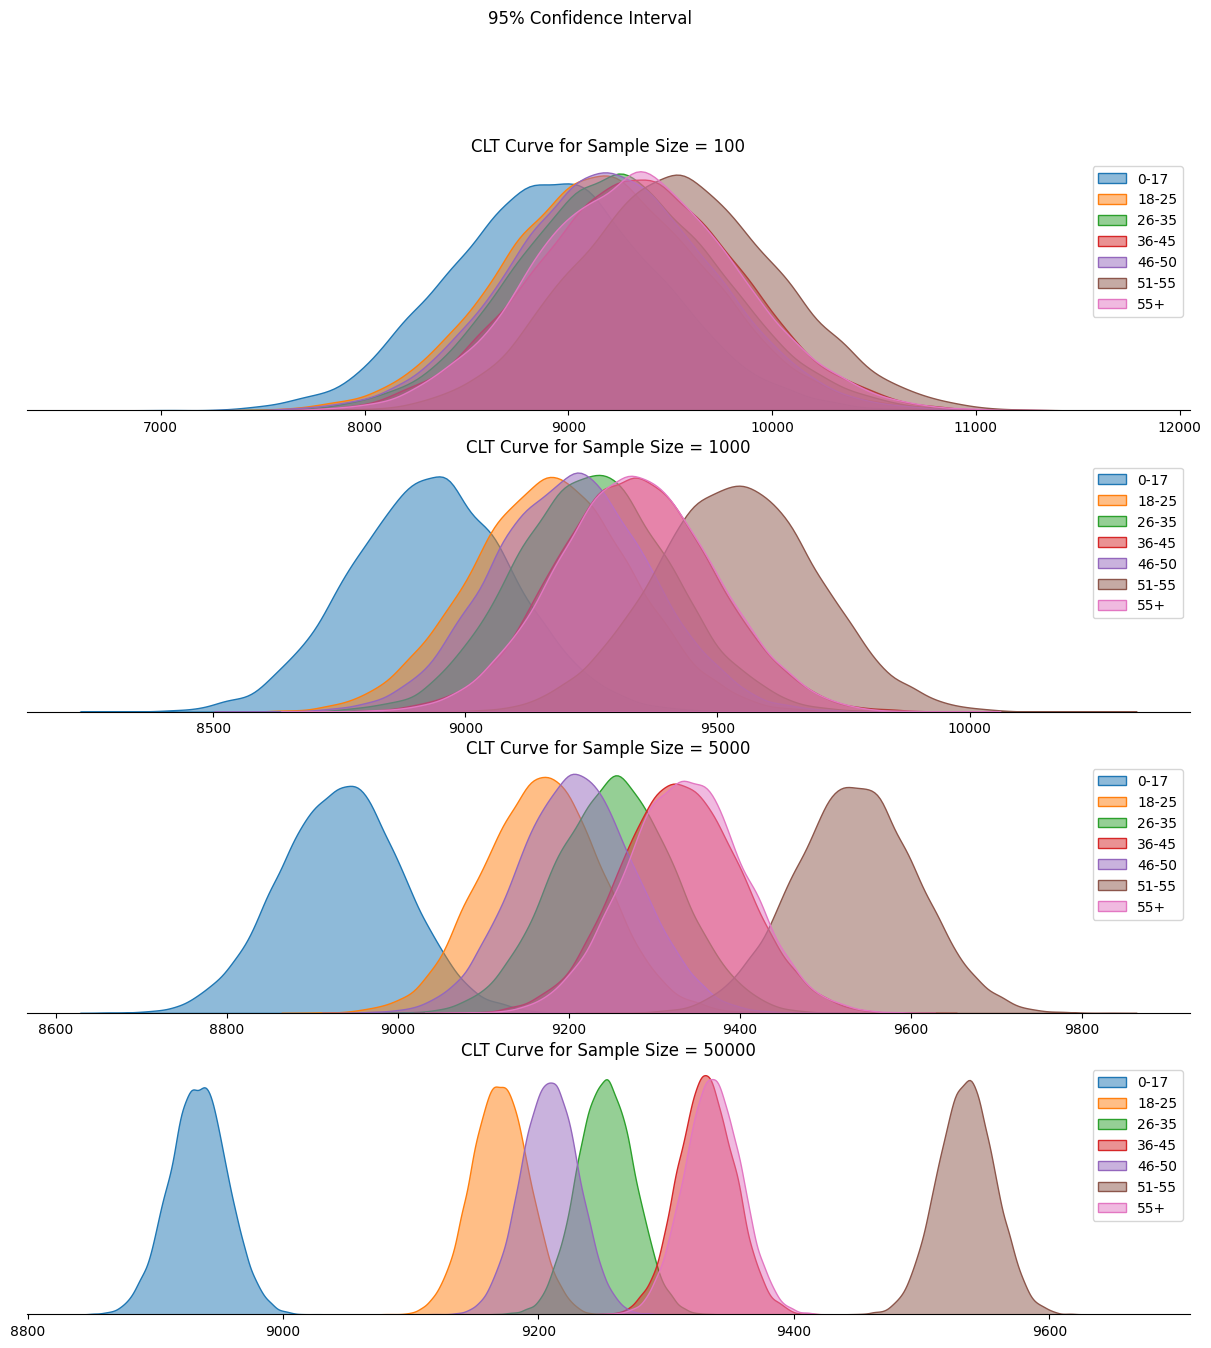

In [ ]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

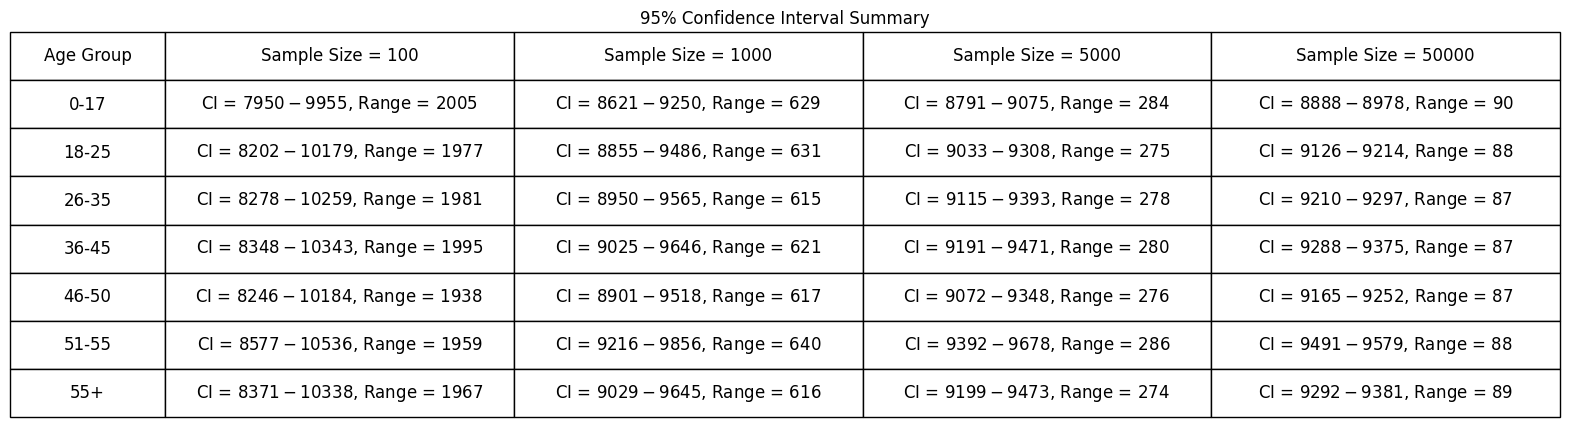

In [ ]:
fig,ax = plt.subplots(figsize = (20,5))
#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']
#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]
samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]
for s,c in samples:
 for i in s:
  s_range = confidence_interval(s[i],95)
  c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")
 #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]
#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])
table.set_fontsize(13)
#removing axis
ax.axis('off')
#setting title
ax.set_title(f"95% Confidence Interval Summary")
plt.show()

In [ ]:
'''
Insights:
Confidence Intervals and Sample Size
The analysis shows that as sample size increases, the confidence intervals become narrower, which aligns with statistical principles. This suggests that larger samples yield more reliable insights by reducing variability. Additionally, the confidence intervals for different sample sizes overlap across most categories, indicating no significant differences in means between samples of varying sizes.

City Category Variability
The confidence interval for City Category C is notably wider than for other categories, indicating higher variability in purchasing behavior within this category. This insight could be valuable for understanding customer diversity and targeting specific segments within City Category C.

Age-Based Spending Patterns

0-17: Customers in this age group display the lowest average spending per transaction, suggesting a more budget-conscious demographic.
18-25, 26-35, 46-50: These age groups have overlapping confidence intervals, indicating similar buying characteristics. They might be ideal for standardized promotions or broad-range product offerings.
36-45, 55+: These groups also show overlapping spending patterns, potentially indicating shared interests or lifestyle needs.
51-55: Customers in this age group have the highest spending per transaction, suggesting a tendency for premium purchases.
Customer Segmentation Based on Age and Gender
Male customers, across various age groups, contribute significantly to Black Friday sales, while the age group 26-45 constitutes the majority of purchases. These patterns can inform targeted marketing strategies and product offerings that appeal to this high-value customer segment.

Business Recommendations:
Targeted Marketing for Key Age Group (26-35)
Since the 26-35 age group demonstrates high purchase counts, Walmart should focus marketing efforts on this demographic. Tailoring promotions, product offerings, and advertisements to resonate with the specific preferences of this age group could drive more sales.

Occupation-Based Promotions
Occupation "4" exhibits the highest representation in purchase data. Walmart should consider offering exclusive product bundles, targeted discounts, or loyalty programs for individuals in this occupation, potentially driving additional purchases from this segment.

City-Specific Strategies

City Category B: This category shows the highest purchases. Walmart could prioritize marketing resources and promotions for City Category B, tailoring product selections and campaigns to the preferences observed in this region.
City Category C: Due to its high variability, City Category C could benefit from segmented campaigns targeting diverse customer profiles within this category.
Age-Based Product and Pricing Optimization
Walmart could optimize product selection and pricing strategies to appeal to specific age groups:

0-17: Increase spending per transaction by offering attractive discounts, loyalty programs, or products that resonate with younger shoppers.
18-50 (18-25, 26-35, 46-50): Standardize offerings that cater to these overlapping buying patterns.
51-55: Since this group shows a higher spending threshold, Walmart could introduce premium services, personalized recommendations, or exclusive loyalty rewards to maximize value from this demographic.
Gender-Focused Campaigns
As males show a significant purchase presence, especially on Black Friday, Walmart should develop tailored product recommendations, pricing strategies, and promotions that align with male shopping patterns, especially in high-interest categories.

Targeting Single Shoppers
Single individuals contribute significantly to overall sales. Walmart could increase engagement with this demographic through campaigns and product recommendations that align with single lifestyles, potentially boosting loyalty.

Encourage Long-Term Residency in Local Stores
Walmart could consider loyalty programs that encourage longer-term residency within customers' local regions. Offering exclusive benefits to customers who have resided in their cities for over a year could increase customer retention and foster loyalty.

Post-Event Engagement Strategies
Post-Black Friday engagement is critical. Walmart should follow up with customers who made purchases by sending personalized emails or offers for related products, thereby encouraging repeat business throughout the holiday season and fostering brand loyalty.

Additional Recommendations:
Data-Driven Product Development
Analyzing purchasing patterns of high-spending customers, especially within City Category B and among males, can provide insights for product development. Walmart should ensure its product offerings align closely with these customers' preferences to optimize revenue.

Occupation-Driven Promotions
Implementing occupation-specific promotions for top groups, such as "Occupation 0" and "Occupation 4," could capitalize on observed high purchase tendencies. Tailored deals, incentives, or exclusive product bundles can further drive engagement within these occupational groups.

'''